# Unsupervised Machine Learning Project

**Problem Statement 1:**

Utilize agglomerative clustering for actual and predicted classTasks to be performed:

•Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

•Find out the unique number of high level class.

•Use the 16-intermediate feature and perform an agglomerative clustering. [ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

•Compute the mean squared error by comparing the actual class and predicted high level class.Unsupervised Machine LearningProject

In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Step 1: Load the Data

In [3]:
#Loading the Dataset 
df = pd.read_csv('zoo.csv')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
print(df.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [5]:
# Show info and first five rows
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [6]:
print(df.dtypes)

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object


In [7]:
X = df.iloc[:, 1:-1].values 
y_actual = df["class_type"].values
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [8]:
y_actual

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

## Step 2: Find Unique High-Level Classes

In [9]:
unique_classes = np.unique(y_actual)
n_clusters = len(unique_classes)
print(f"Number of unique high-level classes: {n_clusters}")

Number of unique high-level classes: 7


## Step 3: Apply Agglomerative Clustering

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
y_predicted = clustering.fit_predict(X)
y_predicted

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

## Step 4: Compare with Actual Class using MSE

In [12]:
mse = mean_squared_error(y_actual, y_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.673267326732673


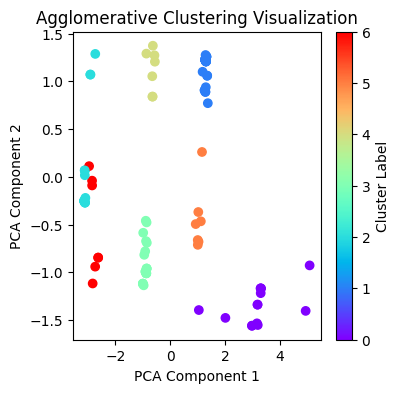

In [13]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.figure(figsize=(4, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predicted, cmap='rainbow', label='Clusters')
plt.colorbar(label='Cluster Label')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()